In [4]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Data ingestion for ML

In [37]:
df = pd.read_csv('data.csv', index_col=0)
df = df[['Reactions', 'Composure', 'Vision', 'ShortPassing', 'BallControl', 'Overall', 'Name']]
df = df.dropna()

player_df = pd.read_csv('data.csv', index_col=0)
player_df = player_df[['Value','Wage']]
# player_df = player_df.dropna()

df = shuffle(df, random_state=10)
print(df.head())

       Reactions  Composure  Vision  ShortPassing  BallControl  Overall  \
16133       46.0       48.0    42.0          55.0         64.0       58   
6285        66.0       66.0    63.0          61.0         66.0       69   
15884       55.0       51.0    47.0          53.0         55.0       58   
9156        56.0       55.0    37.0          59.0         49.0       66   
495         77.0       61.0    57.0          37.0         34.0       80   

              Name  
16133     A. Bakir  
6285   Jo√£o Victor  
15884     B. Singh  
9156      G. Milan  
495        J. Zoet  


In [38]:
def wage_split(x):
    try:
        return int(x.split("K")[0][1:])
    except:
        return 0

player_df['Wage'] = player_df['Wage'].apply(lambda x : wage_split(x))
def value_split(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])
        elif 'K' in x:
            return float(x.split("K")[0][1:])/1000
    except:
        return 0
    
player_df['Value'] = player_df['Value'].apply(lambda x : value_split(x))
player_df = player_df.dropna()


### Train Test split

In [39]:
X = df.drop(['Overall', 'Name'], axis=1).values
#name = df['Name'].values
Y = df['Overall'].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X2 = player_df['Value'].values.reshape(-1,1)
y2 = player_df['Wage'].values.reshape(-1,1)
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.2, random_state=99)

### Fit a Linear Regression Model

In [40]:
from sklearn import svm
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

regressor = LinearRegression()
regressor.fit(X_train2,y_train2)
#y_pred = reg.predict(X_test)
#print('Accuracy of linear regression classifier on test set: {:.2f}'.format(reg.score(X_test, y_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(regressor.intercept_)
print(regressor.coef_)
y_pred2 = regressor.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
# df2

[1.48930347]
[[3.45324246]]


In [46]:
import pickle
filename='Regressor_model.sav'
pickle.dump(reg, open(filename, 'wb'))
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.coef_

# 
# For Wage
filename2='Regressor_model2.sav'
pickle.dump(regressor, open(filename2, 'wb'))
load_lr_model2 =pickle.load(open(filename2, 'rb'))
load_lr_model2.coef_

array([[3.45324246]])

In [44]:
new_player = [95, 96, 94, 90, 96]
print(load_lr_model.predict([new_player]))

[89.10499743]


In [45]:
new_player = [66, 68, 64, 67, 70]

def calc_overall(new_player, model):
    return model.predict([new_player])

print(calc_overall(new_player, reg))

[69.83749845]


In [48]:
print(calc_overall([401],regressor))

[[1386.23952877]]


### Nearest Neighbour- full dataset

In [18]:
df = pd.read_csv('data_reduced.csv', index_col=0)
df = shuffle(df, random_state=10)

df = df[['Reactions', 'Composure', 'Vision', 'ShortPassing', 'BallControl', 'Name']]
df = df.dropna()

X = df.drop('Name', axis=1)
y = df['Name']

In [19]:
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [32]:
new_player = [70, 70, 70, 70, 70]
preds = neigh.kneighbors([new_player], 3, return_distance=False)

closest_players = [y.iloc[pred] for pred in preds[0]]
print(closest_players)

['D. Fagundez', 'J. Brownhill', 'J. Torres']


In [66]:
df = pd.read_csv('data.csv', index_col=0)
photos = []
# print(df.head())
for i in closest_players:
    df1 = df[df['Name'] == i]
    
    if df1.shape[0] ==1:
        photos.append(df1['Photo'].to_string(index=False) )
    else:
        
        photos.append(df1['Photo'].iloc[0]) 
dic = {'player1' : [closest_players[0],photos[0]] , 'player2' : [closest_players[1],photos[1]] , 'player3': [closest_players[2],photos[2]]}
dic['player2']


['J. Brownhill', ' https://cdn.sofifa.org/players/4/19/220659.png']

### Plotting

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

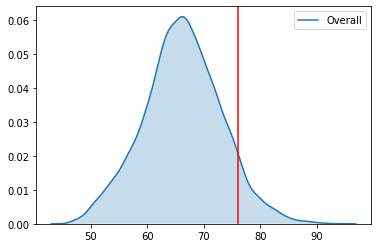

In [98]:
def player_plot(player_name):
    player = df.query(f"Name == '{player_name}'")
    player_rating = int(player['Overall'].to_string(index=False))
    sns_plot = sns.kdeplot(x, shade=True)
    plt.axvline(player_rating, 0, 1, color='red')
    fig = sns_plot.get_figure()
    fig.savefig("output.png")

player_plot('Juanmi')